## Installing gdown

In [1]:
!pip install --upgrade --no-cache-dir gdown

### 2-1

In [2]:
import gdown


file_id = "1G9DZ_ylUqlZmZge9kIFeZUQ3TkAwlFaj"
url = f"https://drive.google.com/uc?id={file_id}"

# File Direction
File_dir = "Data.npy"

gdown.download(url, File_dir, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1G9DZ_ylUqlZmZge9kIFeZUQ3TkAwlFaj
To: /content/Data.npy
100%|██████████| 928/928 [00:00<00:00, 2.57MB/s]


'Data.npy'

In [3]:
import numpy as np

Data = np.load(File_dir)

In [4]:
Data

array([ 40.25196507,  39.53010126,  37.7992167 ,  37.32837052,
        28.65394346,  29.69747547,  26.10881978,  27.83802602,
        22.99054421,  25.80112967,  21.29795526,  19.91155621,
        14.96131425,  11.47430672,  16.95134087,  13.78849326,
         9.82605161,   6.51423783,   7.28107882,   4.71364215,
         0.82726539,   2.0547798 ,   1.75589251,   4.69110905,
        -3.1080814 ,   6.5508178 ,   9.30439077,  -5.9567694 ,
         2.87594962,   3.1993877 ,  -2.70786354,   2.15378132,
        -1.77644948,  -5.11557224,  -4.43062279,   6.25451526,
         1.9854139 ,   7.74342429,  -0.75124188,   4.43658355,
         2.96815869,   1.56463746,   0.77572103,   6.78279848,
        -0.71535178,   2.83930294,   0.35701732, -14.02823175,
         2.74610814,  -8.92342079,  -5.25805964,  -5.91984033,
       -11.23785323, -11.91938329,  -4.2483209 ,  -0.19964379,
        -9.63227683, -13.30314598, -13.12628213,  -7.21216734,
        -6.38891745,  -0.4667489 ,  -8.21628152,  -3.07

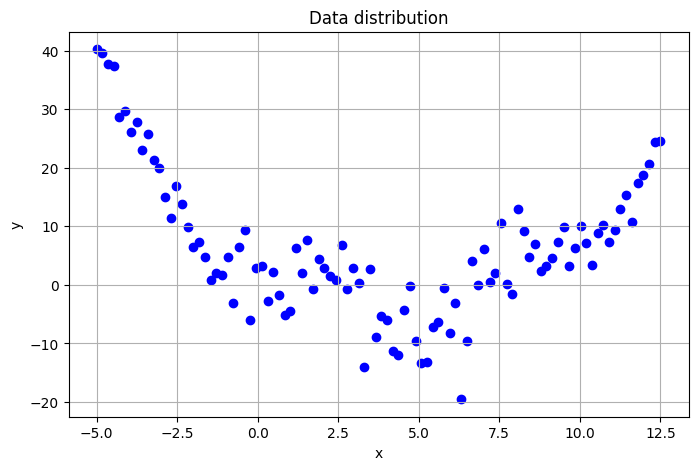

In [17]:
import matplotlib.pyplot as plt


x_new = np.linspace(-5, 12.5, len(Data))

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(x_new, Data, label="Data", color='blue')
plt.title("Data distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


# Display the adjusted x and y for the user
adjusted_data = np.column_stack((x_new, Data))

In [18]:
import pandas as pd
df = pd.DataFrame(adjusted_data, columns=["x", "y"])

In [19]:
df

,x,y
0,-5.000000,40.251965
1,-4.823232,39.530101
2,-4.646465,37.799217
3,-4.469697,37.328371
4,-4.292929,28.653943
...,...,...
95,11.792929,17.399721
96,11.969697,18.699635
97,12.146465,20.652740
98,12.323232,24.445578


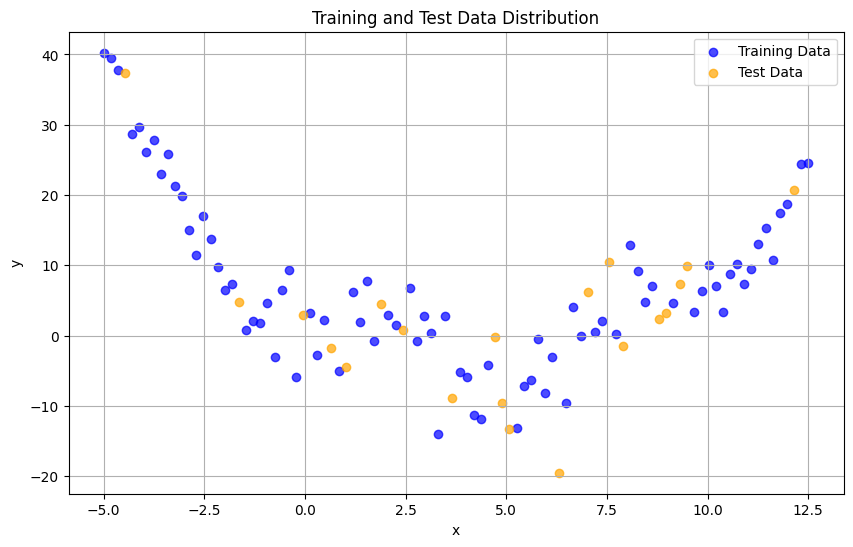

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x = df['x'].values
y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=53)

plt.figure(figsize=(10, 6))

plt.scatter(x_train, y_train, color='blue', label="Training Data", alpha=0.7)

plt.scatter(x_test, y_test, color='orange', label="Test Data", alpha=0.7)

plt.title("Training and Test Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### 2-3

In [10]:
# Step 1: Calculate the coefficients m (slope) and b (intercept)
# Mean of x_train and y_train
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)

# Calculate m (slope)
m = np.sum((x_train - x_mean) * (y_train - y_mean)) / np.sum((x_train - x_mean) ** 2)

# Calculate b (intercept)
b = y_mean - m * x_mean

# Step 2: Generate predictions using the linear model
y_pred_train = m * x_train + b
y_pred_test = m * x_test + b

# Step 3: Evaluate the performance of the model using MSE
mse_train = np.mean((y_train - y_pred_train) ** 2)
mse_test = np.mean((y_test - y_pred_test) ** 2)

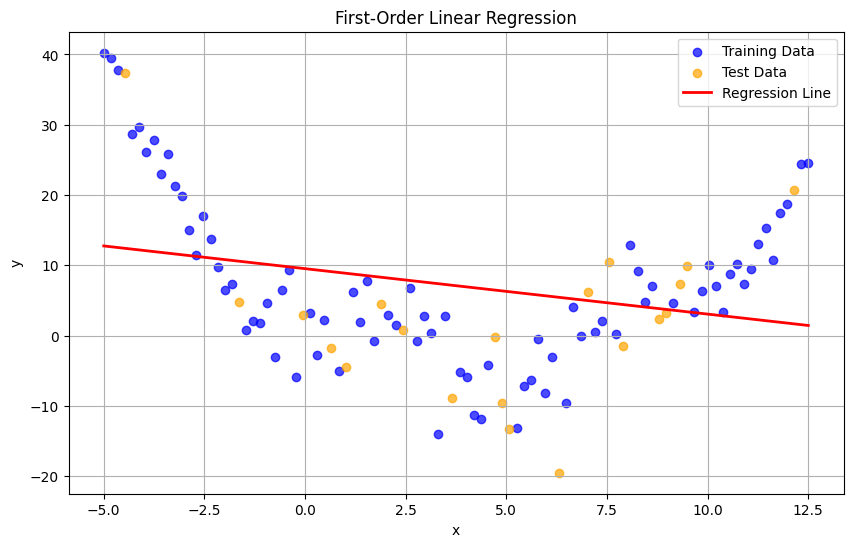

In [11]:
# Step 4: Visualization
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(x_train, y_train, color='blue', label="Training Data", alpha=0.7)

# Plot test data
plt.scatter(x_test, y_test, color='orange', label="Test Data", alpha=0.7)

# Plot the regression line
x_line = np.linspace(min(x), max(x), 1000)
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', label="Regression Line", linewidth=2)

# Add title and labels
plt.title("First-Order Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Display model parameters and performance
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")
print(f"MSE on Training Data: {mse_train}")
print(f"MSE on Test Data: {mse_test}")

Slope (m): -0.6468773697252911
Intercept (b): 9.5195587566984
MSE on Training Data: 129.7546407700454
MSE on Test Data: 155.7522683264296


### 2-4

<ipython-input-13-d328db66f84f>:15: RuntimeWarning: invalid value encountered in scalar divide
  m = np.sum((x_train_subset - x_mean) * (y_train_subset - y_mean)) / np.sum((x_train_subset - x_mean) ** 2)


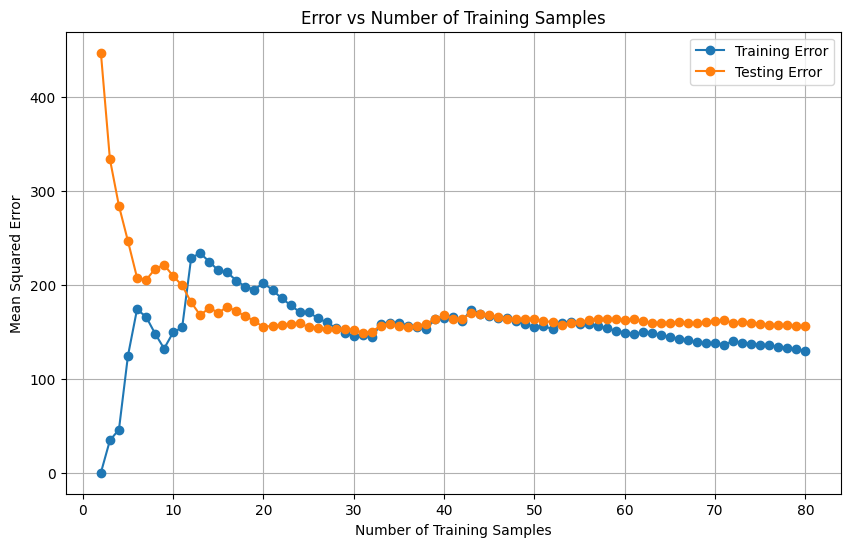

In [13]:
# Initialize variables to store errors
training_errors = []
testing_errors = []
num_training_samples = []

# Training loop: Gradually increase the number of training data
for i in range(1, len(x_train) + 1):
    # Subset of training data
    x_train_subset = x_train[:i]
    y_train_subset = y_train[:i]

    # Calculate slope (m) and intercept (b)
    x_mean = np.mean(x_train_subset)
    y_mean = np.mean(y_train_subset)
    m = np.sum((x_train_subset - x_mean) * (y_train_subset - y_mean)) / np.sum((x_train_subset - x_mean) ** 2)
    b = y_mean - m * x_mean

    # Predictions for training and test data
    y_pred_train = m * x_train_subset + b
    y_pred_test = m * x_test + b

    # Calculate MSE for training and testing data
    mse_train = np.mean((y_train_subset - y_pred_train) ** 2)
    mse_test = np.mean((y_test - y_pred_test) ** 2)

    # Store errors and number of training samples
    training_errors.append(mse_train)
    testing_errors.append(mse_test)
    num_training_samples.append(i)

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(num_training_samples, training_errors, label="Training Error", marker='o')
plt.plot(num_training_samples, testing_errors, label="Testing Error", marker='o')
plt.title("Error vs Number of Training Samples")
plt.xlabel("Number of Training Samples")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

### 2-6

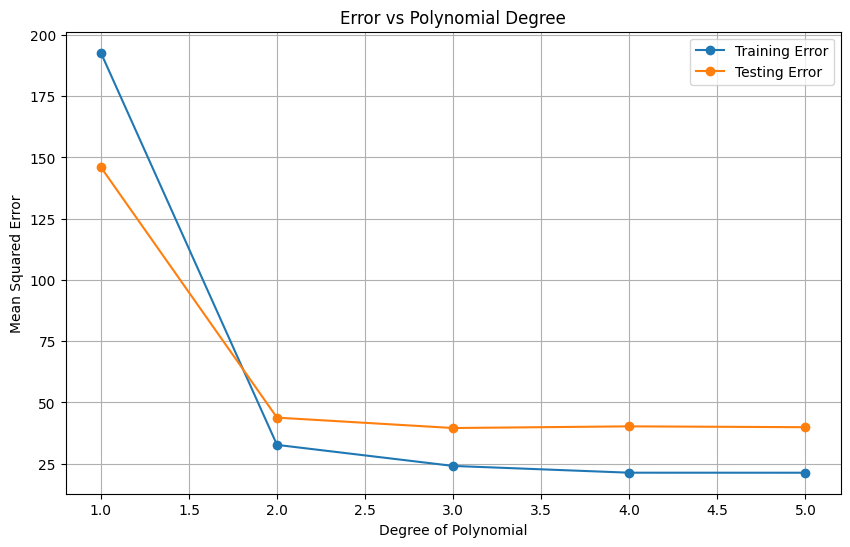

In [14]:
# Initialize variables to store errors
training_errors = []
testing_errors = []
degrees = []

# Step-by-step polynomial regression
max_degree = 5
for degree in range(1, max_degree + 1):
    # Add polynomial terms (x, x^2, x^3, ..., x^degree)
    x_train_poly = np.vstack([x_train**d for d in range(1, degree + 1)]).T
    x_test_poly = np.vstack([x_test**d for d in range(1, degree + 1)]).T

    # Calculate coefficients using the normal equation
    # theta = (X^T X)^(-1) X^T y
    theta = np.linalg.inv(x_train_poly.T @ x_train_poly) @ x_train_poly.T @ y_train

    # Predictions
    y_pred_train = x_train_poly @ theta
    y_pred_test = x_test_poly @ theta

    # Calculate MSE for training and testing data
    mse_train = np.mean((y_train - y_pred_train) ** 2)
    mse_test = np.mean((y_test - y_pred_test) ** 2)

    # Store errors and degree
    training_errors.append(mse_train)
    testing_errors.append(mse_test)
    degrees.append(degree)

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, training_errors, label="Training Error", marker='o')
plt.plot(degrees, testing_errors, label="Testing Error", marker='o')
plt.title("Error vs Polynomial Degree")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Display results
print(f"Degrees: {degrees}")
print(f"Training Errors: {training_errors}")
print(f"Testing Errors: {testing_errors}")

Degrees: [1, 2, 3, 4, 5]
Training Errors: [192.75947963958248, 32.67153599005429, 24.083656997674584, 21.322535831500026, 21.31153347189732]
Testing Errors: [146.04272469834157, 43.80528376902639, 39.55680460256175, 40.23817327339508, 39.89384575642141]


### 2-7

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split data into features (X) and target (y)
x = df['x'].values.reshape(-1, 1)  # Reshape for scikit-learn
y = df['y'].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=53)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=53),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=53)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    results.append({"Model": name, "Training MSE": train_mse, "Testing MSE": test_mse})

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results)

               Model  Training MSE  Testing MSE
0  Linear Regression    129.754641   155.752268
1      Decision Tree      0.000000    47.963904
2      Random Forest      3.494616    34.363958


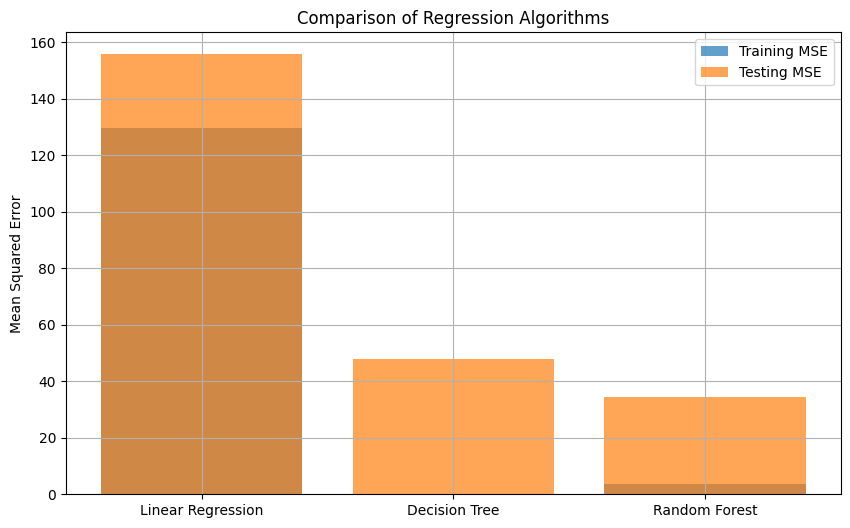

In [29]:
# Display the results
print(results_df)

# Plotting Training vs Testing MSE for comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Training MSE'], label='Training MSE', alpha=0.7)
plt.bar(results_df['Model'], results_df['Testing MSE'], label='Testing MSE', alpha=0.7)
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regression Algorithms')
plt.legend()
plt.grid(True)
plt.show()

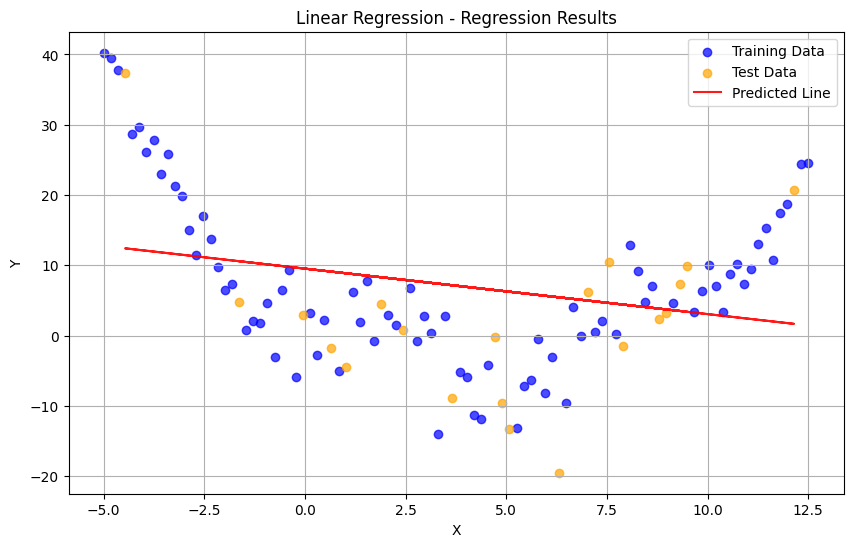

--- Linear Regression ---
Training MSE: 129.7546
Testing MSE: 155.7523




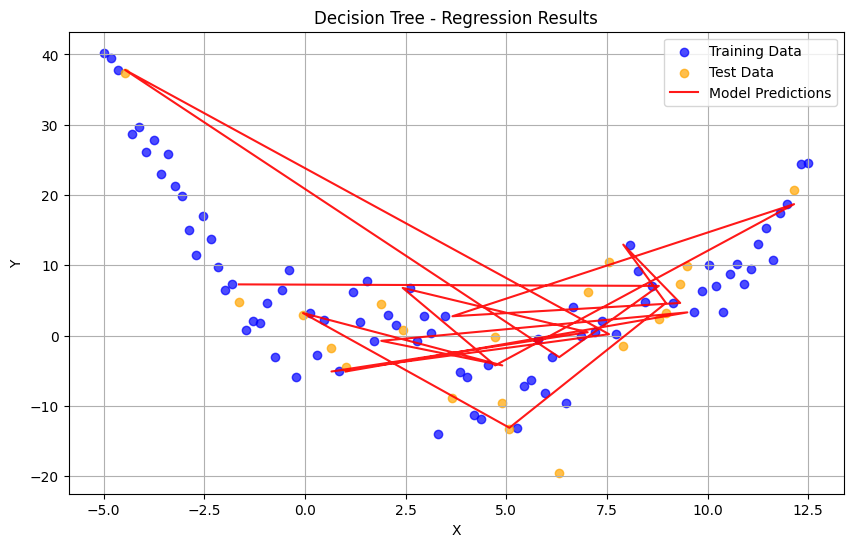

--- Decision Tree ---
Training MSE: 0.0000
Testing MSE: 47.9639




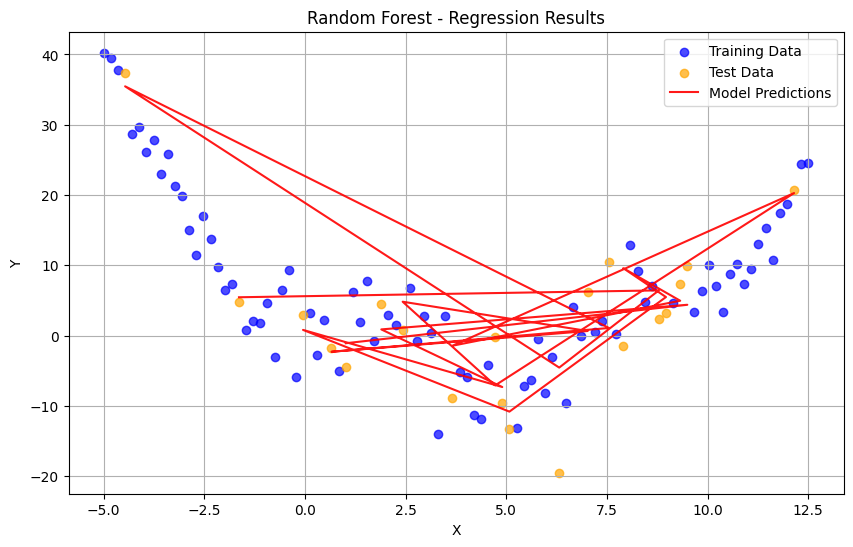

--- Random Forest ---
Training MSE: 3.4946
Testing MSE: 34.3640


Summary:
               Model  Training MSE  Testing MSE
0  Linear Regression    129.754641   155.752268
1      Decision Tree      0.000000    47.963904
2      Random Forest      3.494616    34.363958


In [30]:
# Split data into features (X) and target (y)
x = df['x'].values.reshape(-1, 1)  # Reshape for scikit-learn
y = df['y'].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=53)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=53),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=53)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store results
    results.append({"Model": name, "Training MSE": train_mse, "Testing MSE": test_mse})

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, color='blue', label='Training Data', alpha=0.7)
    plt.scatter(x_test, y_test, color='orange', label='Test Data', alpha=0.7)
    plt.plot(x_test, y_test_pred, color='red', label='Predicted Line' if name == "Linear Regression" else 'Model Predictions', alpha=0.9)
    plt.title(f"{name} - Regression Results")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print report
    print(f"--- {name} ---")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Testing MSE: {test_mse:.4f}")
    print("\n")

# Convert results to DataFrame for summary
results_df = pd.DataFrame(results)

# Display the results summary
print("Summary:")
print(results_df)